<a href="https://colab.research.google.com/github/Raissa-hue310/Project-1-Data-Collection/blob/main/Project1_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Data Collection and Initial Analysis of Stock Market Data
## Student: Raissa Matho Mekjele

## Introduction
You will be working with the “Daily Historical Stock Prices (1970 - 2020)” dataset, which includes the following columns: Date, Open, High, Low, Close, Volume, and Adjusted Close.
## 1.Data Collection

In [1]:
# 1. IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from google.colab import files

plt.style.use("seaborn-v0_8")
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
sns.set()
%matplotlib inline


In [2]:
# 2. LOAD DATA

prices = pd.read_csv("historical_stock_prices.csv")
stocks = pd.read_csv("historical_stocks.csv")

print("Prices shape:", prices.shape)
print("Stocks shape:", stocks.shape)

display(prices.head())
display(stocks.head())

print("\nPrices dtypes:")
print(prices.dtypes)

print("\nStocks dtypes:")
print(stocks.dtypes)

Prices shape: (20973889, 8)
Stocks shape: (6460, 5)


,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.49,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.47,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.51,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.54,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.46,11.50,11.60,184100,2013-05-14


,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS



Prices dtypes:
ticker        object
open         float64
close        float64
adj_close    float64
low          float64
high         float64
volume         int64
date          object
dtype: object

Stocks dtypes:
ticker      object
exchange    object
name        object
sector      object
industry    object
dtype: object


# 2. Data Cleaning

In [3]:
# Check missing values
print("Missing values in prices:")
print(prices.isna().sum())

print("\nMissing values in stocks:")
print(stocks.isna().sum())


Missing values in prices:
ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64

Missing values in stocks:
ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64


- For numeric columns (open, high, low, close, adj_close, volume): fill with median.

- For categorical columns (sector, industry): fill with "Unknown".

In [4]:
# Convert date to datetime before anything else
prices["date"] = pd.to_datetime(prices["date"])

# Numeric columns in price data
price_num_cols = ["open", "high", "low", "close", "adj_close", "volume"]

# Fill numeric NaNs with column median
for col in price_num_cols:
    median_val = prices[col].median()
    prices[col].fillna(median_val, inplace=True)

# For stocks, fill missing sector/industry with 'Unknown'
stocks["sector"].fillna("Unknown", inplace=True)
stocks["industry"].fillna("Unknown", inplace=True)


/tmp/ipython-input-787037194.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prices[col].fillna(median_val, inplace=True)
/tmp/ipython-input-787037194.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [5]:
# Check & remove duplicates
print("Number of duplicate rows in prices:", prices.duplicated().sum())
print("Number of duplicate rows in stocks:", stocks.duplicated().sum())

prices = prices.drop_duplicates()
stocks  = stocks.drop_duplicates()


Number of duplicate rows in prices: 0
Number of duplicate rows in stocks: 0


In [6]:
# Set date as datetime index and sort
prices = prices.sort_values("date")
prices = prices.set_index("date")

prices.head()


,ticker,open,close,adj_close,low,high,volume
date,,,,,,,
1970-01-02,XOM,1.93,1.94,0.03,1.93,1.94,1174400
1970-01-02,AA,7.14,7.14,1.99,7.14,7.23,22500
1970-01-02,BA,0.93,0.98,0.23,0.93,0.98,634400
1970-01-02,DIS,0.69,0.68,0.28,0.68,0.69,1109700
1970-01-02,PG,1.71,1.72,0.02,1.71,1.72,832000


# 3. Data Segmentation by Decade
We’ll create a decade column like 1970, 1980, 1990, etc.

In [7]:
# Extract year from index
prices["year"] = prices.index.year

# Create decade as integer (e.g., 1970, 1980, ...)
prices["decade"] = (prices["year"] // 10) * 10

# See unique decades
sorted(prices["decade"].unique())


[np.int64(1970),
 np.int64(1980),
 np.int64(1990),
 np.int64(2000),
 np.int64(2010)]

In [8]:
decade_dfs = {
    decade: prices[prices["decade"] == decade].copy()
    for decade in sorted(prices["decade"].unique())
}

# Example: show one decade
for d, df in decade_dfs.items():
    print(d, df.shape)
    break


1970 (164499, 9)


# 4. Exploratory Data Analysis by Decade

In [9]:
# MERGE WITH STOCK (SECTOR INFORMATION)

# Keep only the columns we really need from stocks
stocks_small = stocks[["ticker", "sector", "industry"]].drop_duplicates("ticker")

# Merge on 'ticker'
merged = prices.reset_index().merge(
    stocks_small,
    on="ticker",
    how="left"
)

# Set date back as index
merged = merged.set_index("date").sort_index()

merged.head()


,ticker,open,close,adj_close,low,high,volume,year,decade,sector,industry
date,,,,,,,,,,,
1970-01-02,XOM,1.93,1.94,0.03,1.93,1.94,1174400,1970,1970,ENERGY,INTEGRATED OIL COMPANIES
1970-01-02,AA,7.14,7.14,1.99,7.14,7.23,22500,1970,1970,BASIC INDUSTRIES,ALUMINUM
1970-01-02,BA,0.93,0.98,0.23,0.93,0.98,634400,1970,1970,CAPITAL GOODS,AEROSPACE
1970-01-02,DIS,0.69,0.68,0.28,0.68,0.69,1109700,1970,1970,CONSUMER SERVICES,TELEVISION SERVICES
1970-01-02,PG,1.71,1.72,0.02,1.71,1.72,832000,1970,1970,BASIC INDUSTRIES,PACKAGE GOODS/COSMETICS


Now merged has: open, high, low, close, adj_close, volume, year, decade, ticker, sector, industry.

In [10]:
# SUMMARY STATISTICS BY DECADE

summary_stats = (
    merged
    .groupby("decade")[["open", "high", "low", "close", "volume"]]
    .agg(["mean", "median", "std"])
)

summary_stats


open                   high                    low                  \
         mean median      std   mean median      std   mean median      std   
decade                                                                        
1970    12.49   2.79    46.98  12.64   2.84    47.48  12.37   2.77    46.51   
1980    16.81   5.00   573.05  17.10   5.08   582.81  16.56   4.96   562.26   
1990    45.29  10.58 1,391.11  46.87  10.75 1,464.63  43.81  10.44 1,329.33   
2000   122.30  16.58 4,485.64 125.65  16.87 4,703.97 119.17  16.30 4,318.82   
2010    65.26  20.01 1,820.18  66.72  20.28 1,941.57  63.92  19.75 1,763.14   

        close                       volume                           
         mean median      std         mean     median           std  
decade                                                               
1970    12.49   2.79    46.99   724,893.64 187,200.00  1,377,365.79  
1980    16.82   5.00   575.03   837,523.35  64,600.00  4,510,088.44  
1990    45.30  10.59 1,391.58   863,527.19  62,200.00  5,834,011.90  
2000   122.44  16.58 4,509.78 1,383,562.38 133,400.00  9,230,142.84  
2010    65.28  20.01 1,850.13 1,320,505.22 165,400.00 17,707,888.21

In [11]:
# TIME SERIES PLOTS FOR AVERAGE MONTHLY CLOSE PRICE

# Resample to monthly average across all tickers
monthly_close = (
    merged["close"]
    .resample("M")
    .mean()
    .to_frame(name="avg_close")
)

# Add decade info
monthly_close["year"] = monthly_close.index.year
monthly_close["decade"] = (monthly_close["year"] // 10) * 10

monthly_close.head()


/tmp/ipython-input-1237924392.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,avg_close,year,decade
date,,,
1970-01-31,15.54,1970,1970
1970-02-28,15.54,1970,1970
1970-03-31,15.95,1970,1970
1970-04-30,15.45,1970,1970
1970-05-31,13.84,1970,1970


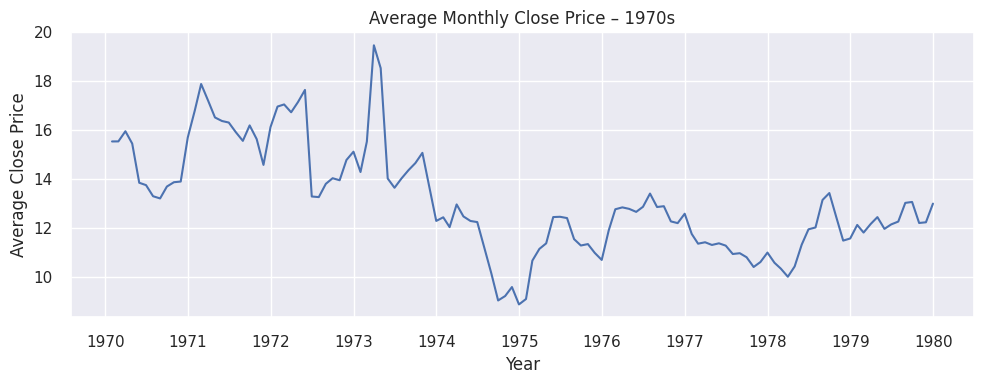

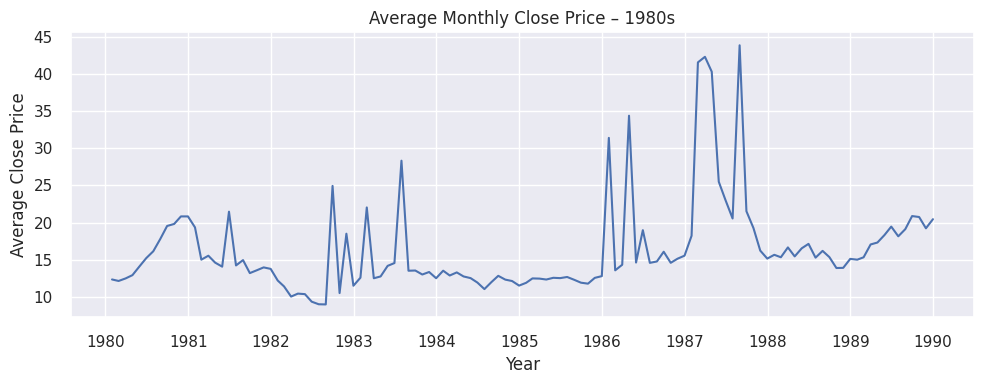

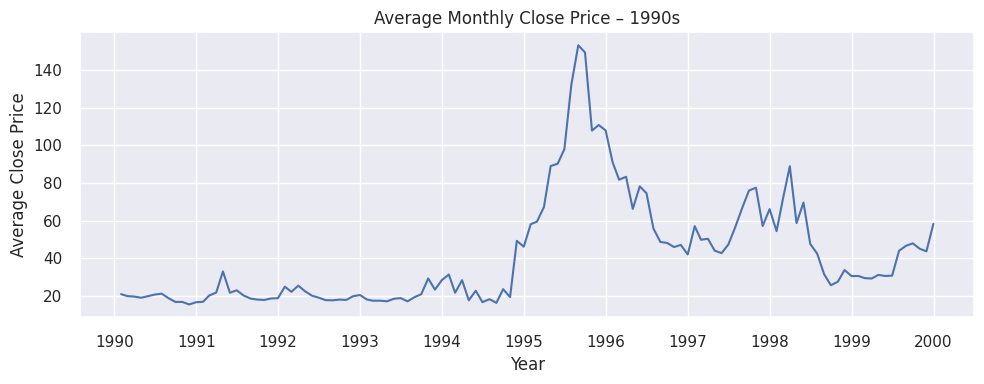

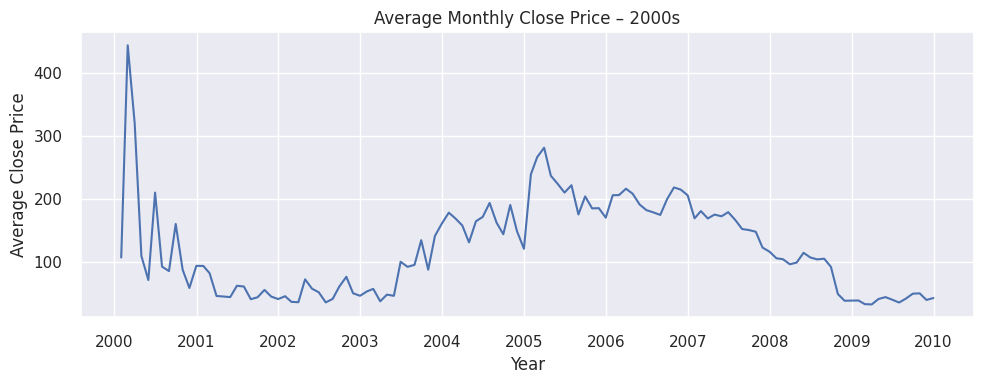

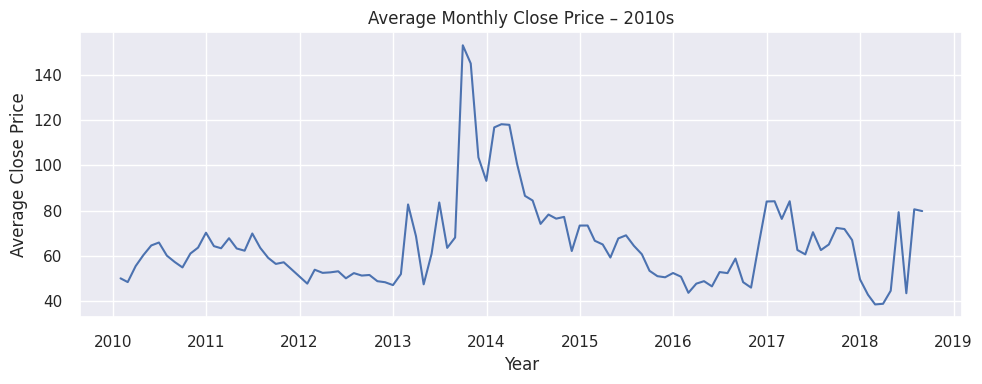

In [12]:
decades = sorted(monthly_close["decade"].unique())

for d in decades:
    df_dec = monthly_close[monthly_close["decade"] == d]
    if df_dec.empty:
        continue

    plt.figure(figsize=(10, 4))
    plt.plot(df_dec.index, df_dec["avg_close"])
    plt.title(f"Average Monthly Close Price – {d}s")
    plt.xlabel("Year")
    plt.ylabel("Average Close Price")
    plt.tight_layout()
    plt.show()


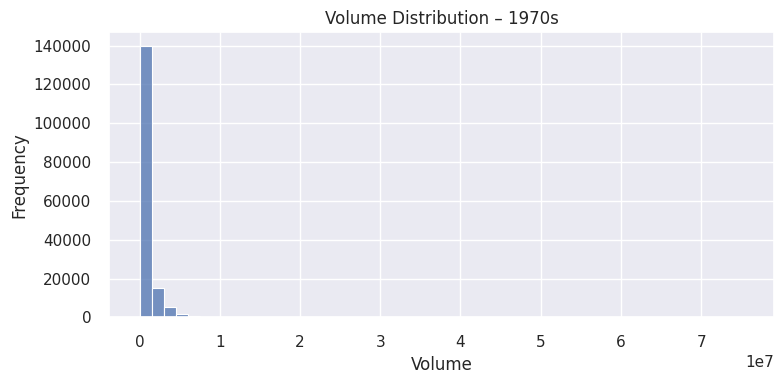

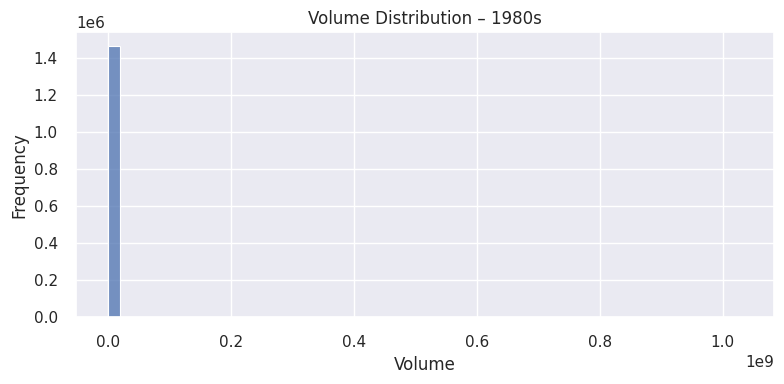

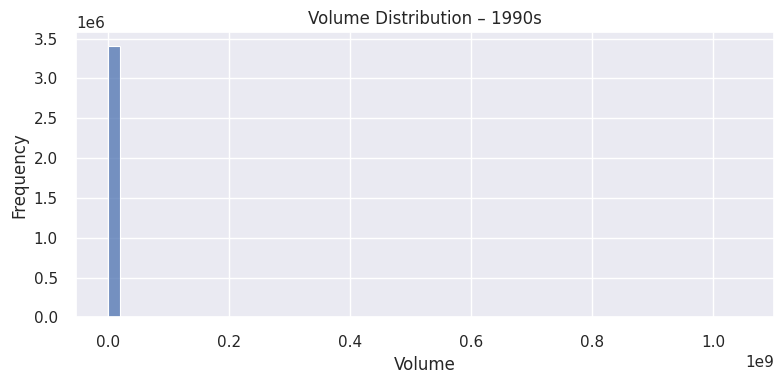

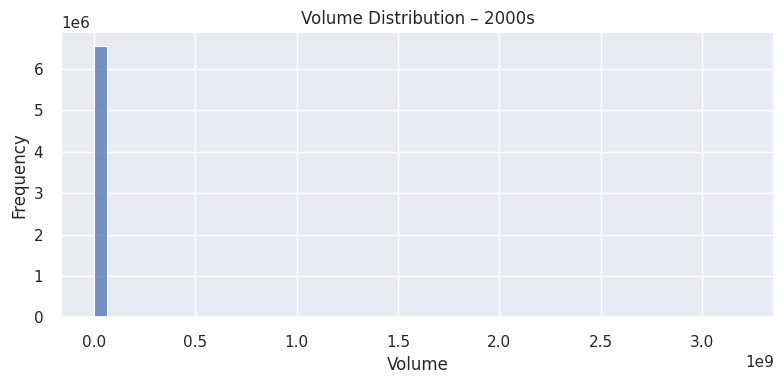

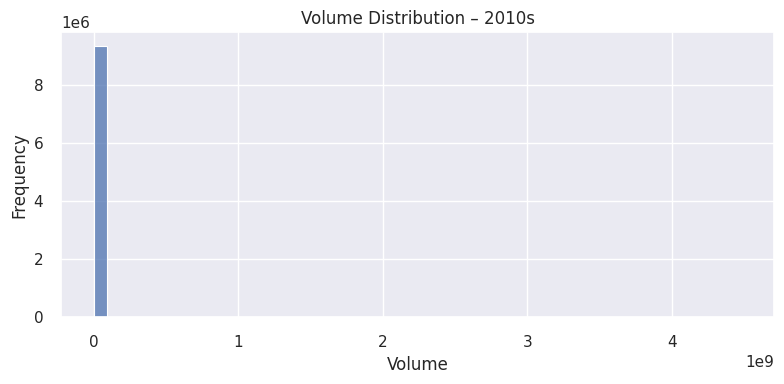

In [13]:
# HISTOGRAMS FOR VOLUME BY DECADE

decades = sorted(merged["decade"].unique())

for d in decades:
    df_dec = merged[merged["decade"] == d]
    if df_dec.empty:
        continue

    plt.figure(figsize=(8, 4))
    sns.histplot(df_dec["volume"], bins=50)
    plt.title(f"Volume Distribution – {d}s")
    plt.xlabel("Volume")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


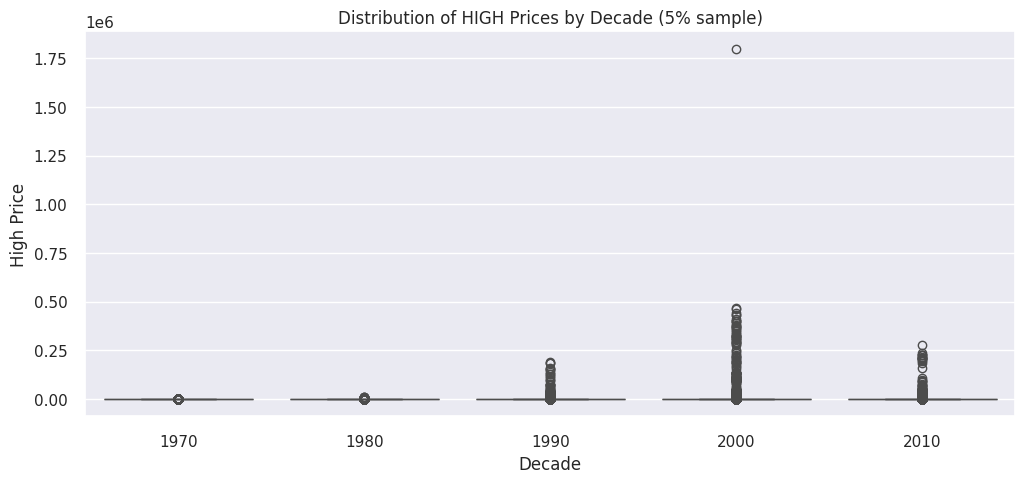

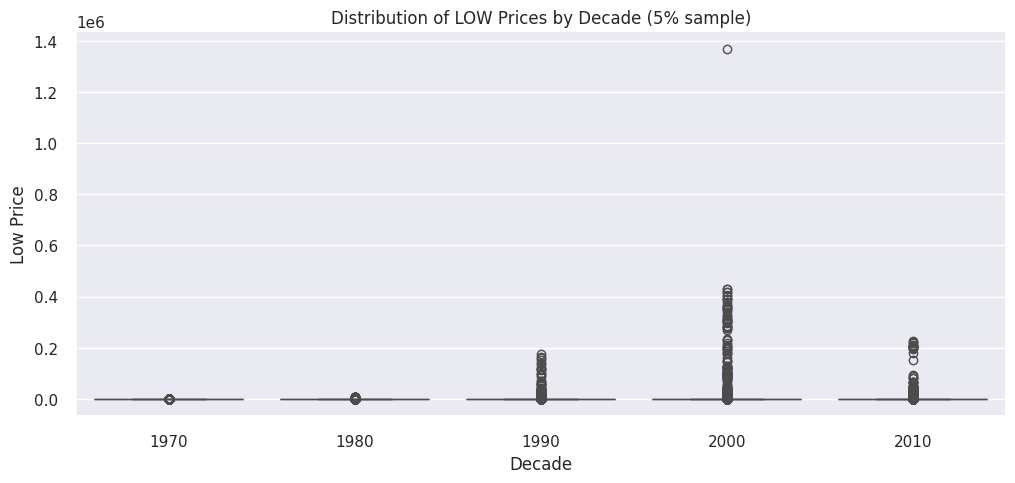

In [14]:
# BOX PLOTS FOR HIGH AND LOW PRICES BY DECADE

sampled = merged.sample(frac=0.05, random_state=42)

plt.figure(figsize=(12, 5))
sns.boxplot(x="decade", y="high", data=sampled)
plt.title("Distribution of HIGH Prices by Decade (5% sample)")
plt.xlabel("Decade")
plt.ylabel("High Price")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="decade", y="low", data=sampled)
plt.title("Distribution of LOW Prices by Decade (5% sample)")
plt.xlabel("Decade")
plt.ylabel("Low Price")
plt.show()


# 5. Comparative Analysis

In [15]:
# COMPARATIVE STATS – FOCUS ON CLOSE & VOLUME

comparative_close = (
    merged
    .groupby("decade")["close"]
    .agg(["mean", "median", "std", "min", "max"])
    .round(2)
)

comparative_volume = (
    merged
    .groupby("decade")["volume"]
    .agg(["mean", "median", "std", "min", "max"])
    .round(2)
)

display(comparative_close)
display(comparative_volume)


,mean,median,std,min,max
decade,,,,,
1970,12.49,2.79,46.99,0.02,452.50
1980,16.82,5.00,575.03,0.00,"303,750.00"
1990,45.30,10.59,"1,391.58",0.01,"262,500.00"
2000,122.44,16.58,"4,509.78",0.00,"1,779,750.00"
2010,65.28,20.01,"1,850.13",0.00,"1,347,500.00"


,mean,median,std,min,max
decade,,,,,
1970,"724,893.64","187,200.00","1,377,365.79",50,75315200
1980,"837,523.35","64,600.00","4,510,088.44",100,1031788800
1990,"863,527.19","62,200.00","5,834,011.90",1,1047620000
2000,"1,383,562.38","133,400.00","9,230,142.84",1,3194507200
2010,"1,320,505.22","165,400.00","17,707,888.21",1,4483504400
